# **Assignment 5: RISK**


**Dice Rolls**
-   Attacker rolls up to 3 dice. This depends on how many troops the attacker has. The attacker can roll 1, 2, or 3 dice, but they must have at least as many troops as the number of dice they wish to roll.
-   Defender rolls up to 2 dice. The defender can roll 1 or 2 dice depending on how many troops they have. If the defender has only 1 troop, they can only roll 1 die.

**Simulate multiple rounds of battles**, 
-   where the attacker and defender roll their dice and compare them.
-   The highest dice of each side are compared first, the second highest next, and so on.
-   If the attacker's dice is higher, the defender loses a troop. If the defender's dice is higher, the attacker loses a troop.

**Goal:** Simulate 1000 rounds of battles and track how many times the attacker or defender loses a troop in total.


Attack(n_attackers=1, n_defenders=1)
Attacker losses: 602, Defender losses: 398

Attack(n_attackers=1, n_defenders=2)
Attacker losses: 776, Defender losses: 224

Attack(n_attackers=2, n_defenders=1)
Attacker losses: 408, Defender losses: 592

Attack(n_attackers=2, n_defenders=2)
Attacker losses: 1215, Defender losses: 785

Attack(n_attackers=3, n_defenders=1)
Attacker losses: 315, Defender losses: 685

Attack(n_attackers=3, n_defenders=2)
Attacker losses: 889, Defender losses: 1111



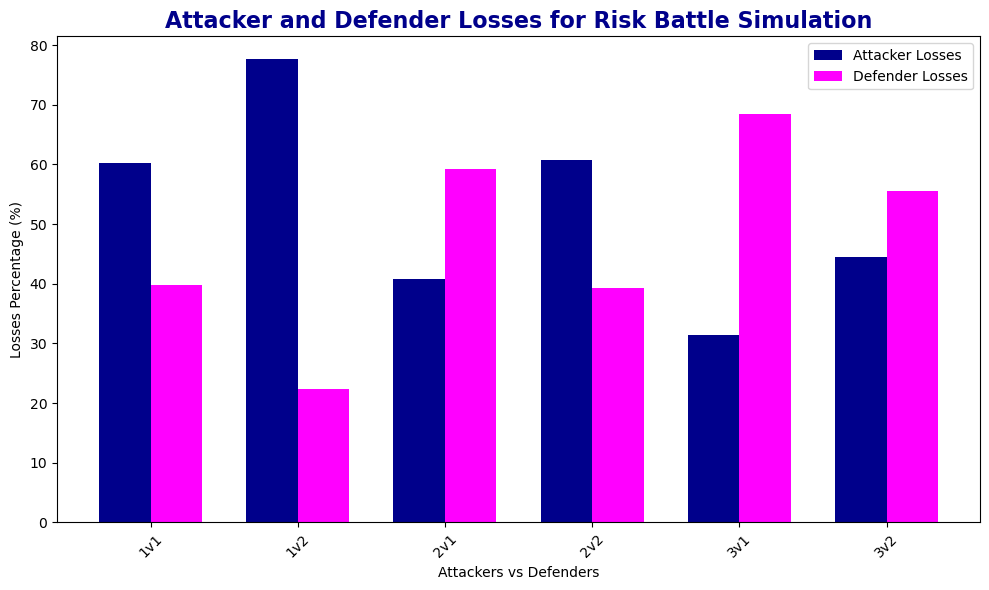

In [2]:
from typing import NamedTuple
import numpy as np
import matplotlib.pyplot as plt

n_repeats = 1000  # Number of battles to simulate

class Attack(NamedTuple): # NamedTuple to store the number of attackers and defenders
    n_attackers: int 
    n_defenders: int

# Define the different combinations of attackers and defenders
options = [
    Attack(x, y) for x in range(1, 4) for y in range(1, 3)
]

# Initialize random number generator
rng = np.random.default_rng()

# Store results to plot later
attacker_losses = []
defender_losses = []

# Simulate battles for each combination of attackers and defenders
for option in options:
    print(option)

    # Generate attacker's and defender's dice rolls
    attack = rng.integers(1, 7, size=(n_repeats, option.n_attackers))
    attack.sort(axis=1)
    attack = np.flip(attack, axis=1)  # Flip to descending order
    #print(attack)

    defence = rng.integers(1, 7, size=(n_repeats, option.n_defenders))
    defence.sort(axis=1)
    defence = np.flip(defence, axis=1)  # Flip to descending order
    #print(defence)

    # Compare up to the minimum number of dice
    min_length = min(attack.shape[1], defence.shape[1])
    result = attack[:, :min_length] > defence[:, :min_length]

    # Calculate losses for both attacker and defender
    losses_attacker = np.sum(result == False)  # Attacker loses where result is False
    losses_defender = np.sum(result == True)   # Defender loses where result is True

    print(f"Attacker losses: {losses_attacker}, Defender losses: {losses_defender}\n")

    # Store the results for plotting
    attacker_losses.append(losses_attacker / (n_repeats * min_length) * 100)  # Convert to percentage
    defender_losses.append(losses_defender / (n_repeats * min_length) * 100)  # Convert to percentage

# Prepare the bar chart
labels = [f"{option.n_attackers}v{option.n_defenders}" for option in options]
x_pos = np.arange(len(labels)) 

# Plotting the bar chart with two bars for each simulation (attacker losses and defender losses)
bar_width = 0.35 
plt.figure(figsize=(10, 6))

# Plotting the attacker and defender losses side by side
plt.bar(x_pos - bar_width / 2, attacker_losses, bar_width, label='Attacker Losses', color='darkblue')
plt.bar(x_pos + bar_width / 2, defender_losses, bar_width, label='Defender Losses', color='magenta')

# Adding labels and title
plt.xticks(x_pos, labels, rotation=45)
plt.xlabel('Attackers vs Defenders')
plt.ylabel('Losses Percentage (%)')
plt.title('Attacker and Defender Losses for Risk Battle Simulation', fontsize=16, fontweight='bold', color='darkblue')

# Show legend
plt.legend()


plt.tight_layout()
plt.show()


*** 
### **Explanation of code**


![image-2.png](attachment:image-2.png)

```n_repeats = 1000```
-   1000 repetitions ran for each combination of attackers and defenders. 

```class Attack(NamedTuple):```
-   The code uses a class Attack using pythons NamedTuple which is a subclass of pythons built in tuple,each element can be accessed by name. 
-   the class has two attributes: ```n_attackers``` and ```n_defenders```(number of attackers and defenders.)
-   Each instance of this class will represent one scenario in which a specific number of attackers and defenders are in a battle. 

```options=[Attack(x,y) for x in range (1,4) for y in range(1,3)]```
-   This creates a list that generates combinations of attackers and defenders. it loops through values of x and y. 
-   x (attackers takes values from 1-3)
-   y (defenders takes values from 1-2)
-   Result:(1,1), (1,2), (2,1), (2,2), (3,1), (3,2)

```rng=np.random.default_rng()```
-   This uses NumPy's random number generator to simulate dice rolls for both attackers and defenders. 

```attacker_losses=[] defender_losses=[]```
-   Empty lists that will be used in later parts of the code to store the losses percentage of attackers and defenders. 

![image-3.png](attachment:image-3.png)

```min_length = min(attack.shape[1], defence.shape[1])```
-   determines the minimum amount of dice. 
-   compares the same number of dice between the attacker and defenders. example: if there is 3 attackers and 2 defenders, only the top two dice should be compared. 

```attack[:, :min_length]``` and ```defence[:, :min_length]```
-   slice the arrays to the minimum length ensuring that the comparison only occurs for the minimum number of dice. 

The dice rolls of the attackers are compared to the dice rolls of the defenders creating a boolean array where *True* means the attacker wins by having a higher dice number while *False* means that the defender wins by either having a higher dice number or an equal number as defenders win ties. 

![image.png](attachment:image.png)

The percentage of losses for both the attacker and defender is calculated and appended to the attacker_losses and defender_losses lists. This percentage is calculated by dividing the number of losses by the total number of comparisons (which is n_repeats * min_length), and then multiplying by 100 to convert it to a percentage.

***

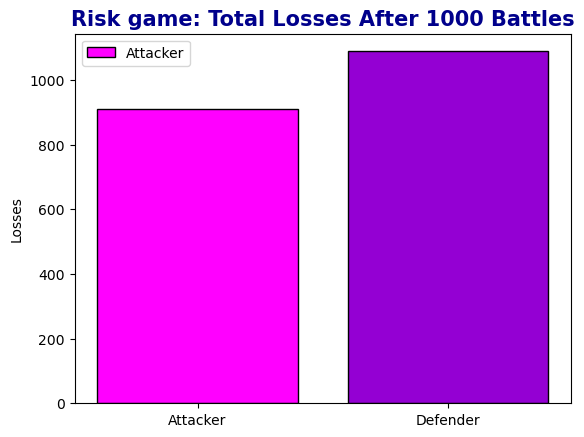

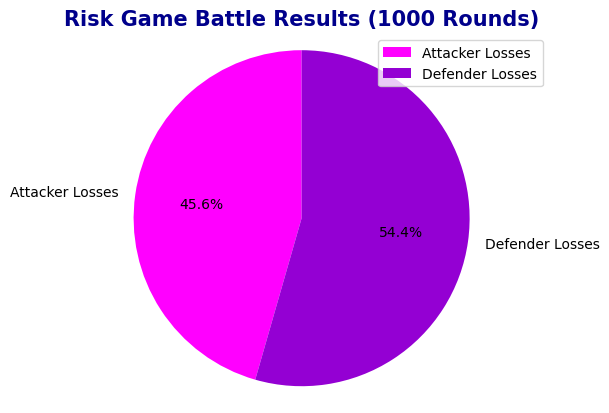

Attacker losses: 911
Defender losses: 1089


In [ ]:
import random
import matplotlib.pyplot as plt

# Variables to track total losses
attacker_losses = 0                                                      # Attacker losses counter starting at 0 due to no losses yet
defender_losses = 0                                                      # Defender losses counter starting at 0 due to no losses yet


num_battles = 1000

# Simulate 1000 battle rounds using a loop
for _ in range(num_battles):                                             # for loop to loop through the number of battles. in range(num_battles) is the number of battles to be simulated
    # Attacker rolls 3 dice
    attacker_rolls = sorted([random.randint(1, 6) for _ in range(3)], reverse=True)             # three dice rolls in descending order 
    # Defender rolls 2 dice                                                                     
    defender_rolls = sorted([random.randint(1, 6) for _ in range(2)], reverse=True)             # two dice rolls in descending order 

    # Compare the dice, highest to lowest
    for i in range(min(len(attacker_rolls), len(defender_rolls))):         # loop through the number of dice rolled by the attacker and defender    
        if attacker_rolls[i] > defender_rolls[i]:
            defender_losses += 1
        else:
            attacker_losses += 1

# Plot the results:
# Bar chart
plt.bar(['Attacker', 'Defender'], [attacker_losses, defender_losses], color=['magenta', 'darkviolet'], edgecolor='black')
plt.title(f"Risk game: Total Losses After {num_battles} Battles", fontsize=15, fontweight='bold', color='Darkblue')
plt.ylabel('Losses')
plt.legend(['Attacker', 'Defender'])
plt.show()

attacker_total_losses = attacker_losses 
defender_total_losses = defender_losses 




# Pie chart
labels = ['Attacker Losses', 'Defender Losses']
sizes = [attacker_total_losses, defender_total_losses]
colors = ['magenta','darkviolet']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Risk Game Battle Results (1000 Rounds)', fontsize=15, fontweight='bold', color='Darkblue')
plt.legend()
plt.show()

# Print the results
print(f"Attacker losses: {attacker_losses}")
print(f"Defender losses: {defender_losses}")


In [6]:
# References:

# https://thepythoncodingbook.com/2022/12/30/using-python-numpy-to-improve-board-game-strategy-risk/
# https://stackoverflow.com/questions/74421396/risk-game-with-python 